In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

# Importando dados

impoortando o arquivo de focos do inpe

In [2]:
df = pd.read_csv('./brasil_todo_focos_qmd_inpe_20230101_20240101.csv')

## Visualizacoes basicas dos dados

In [3]:
df.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2023/01/02 02:08:00,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.20,0.01,-17.55708,-57.20554,4.5
1,2023/01/02 02:08:00,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.15,0.01,-17.55838,-57.21490,14.5
2,2023/01/02 02:08:00,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.00,0.02,-17.62477,-57.29403,8.8
3,2023/01/02 02:08:00,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.10,0.02,-17.62712,-57.17881,6.7
4,2023/01/02 02:08:00,TERRA_M-M,Brasil,MATO GROSSO DO SUL,CAMAPUÃ,Cerrado,0.0,15.10,0.01,-19.44473,-53.99815,6.1


In [4]:
df['DataHora'] = pd.to_datetime(df['DataHora'])
df['mes'] = df['DataHora'].dt.month
df['ano'] = df['DataHora'].dt.year
df['dia'] = df['DataHora'].dt.day
df['hora'] = df['DataHora'].dt.hour
df['minuto'] = df['DataHora'].dt.minute
df['segundo'] = df['DataHora'].dt.second
# drop DataHora
df = df.drop('DataHora', axis=1)

In [5]:
df.describe()

,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,mes,ano,dia,hora,minuto,segundo
count,4.676374e+06,4.676374e+06,4.676374e+06,4.677689e+06,4.677689e+06,4.540902e+06,4.677689e+06,4.677689e+06,4.677689e+06,4.677689e+06,4.677689e+06,4.677689e+06
mean,1.171258e+00,1.044885e+00,-7.203797e+00,-9.008026e+00,-5.173222e+01,4.779538e+01,9.027342e+00,2.023000e+03,1.594510e+01,1.336090e+01,2.964965e+01,1.159911e+01
std,1.174725e+02,4.387797e+00,8.829913e+01,5.674374e+00,7.432865e+00,8.105391e+01,1.998110e+00,1.491631e-02,8.483222e+00,6.374731e+00,1.726426e+01,1.846821e+01
min,-9.990000e+02,0.000000e+00,-9.990000e+02,-3.373356e+01,-7.386338e+01,0.000000e+00,1.000000e+00,2.023000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,3.000000e-01,-1.234271e+01,-5.694970e+01,4.700000e+00,8.000000e+00,2.023000e+03,9.000000e+00,5.000000e+00,1.500000e+01,0.000000e+00
50%,6.000000e+00,0.000000e+00,8.000000e-01,-8.321670e+00,-5.114370e+01,1.400000e+01,9.000000e+00,2.023000e+03,1.600000e+01,1.600000e+01,3.000000e+01,0.000000e+00
75%,1.400000e+01,0.000000e+00,1.000000e+00,-4.731000e+00,-4.545790e+01,7.270000e+01,1.000000e+01,2.023000e+03,2.300000e+01,1.700000e+01,4.500000e+01,2.200000e+01
max,1.200000e+02,1.543100e+02,1.000000e+00,5.217610e+00,-3.479641e+01,8.014300e+03,1.200000e+01,2.024000e+03,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


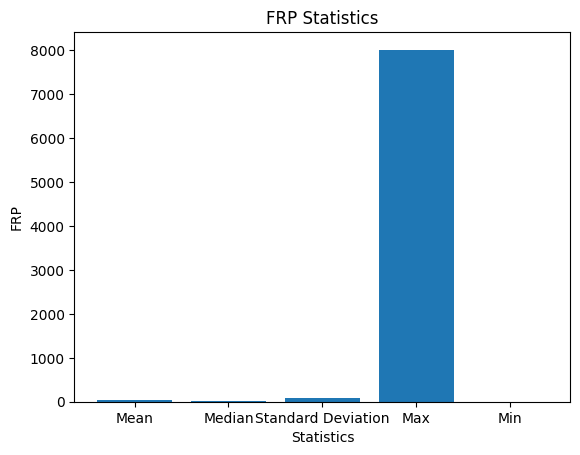

In [6]:
# Entendendo a coluna FRP (Fire Radiative Power)
frp_mean = df['FRP'].mean()
frp_median = df['FRP'].median()
frp_std = df['FRP'].std()
frp_max = df['FRP'].max()
frp_min = df['FRP'].min()

# Create a bar plot
plt.bar(['Mean', 'Median', 'Standard Deviation', 'Max', 'Min'], [frp_mean, frp_median, frp_std, frp_max, frp_min])
plt.xlabel('Statistics')
plt.ylabel('FRP')
plt.title('FRP Statistics')
plt.show()

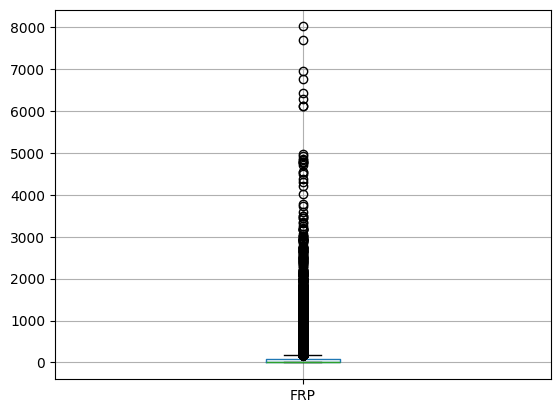

In [7]:
df.boxplot('FRP')
plt.show()

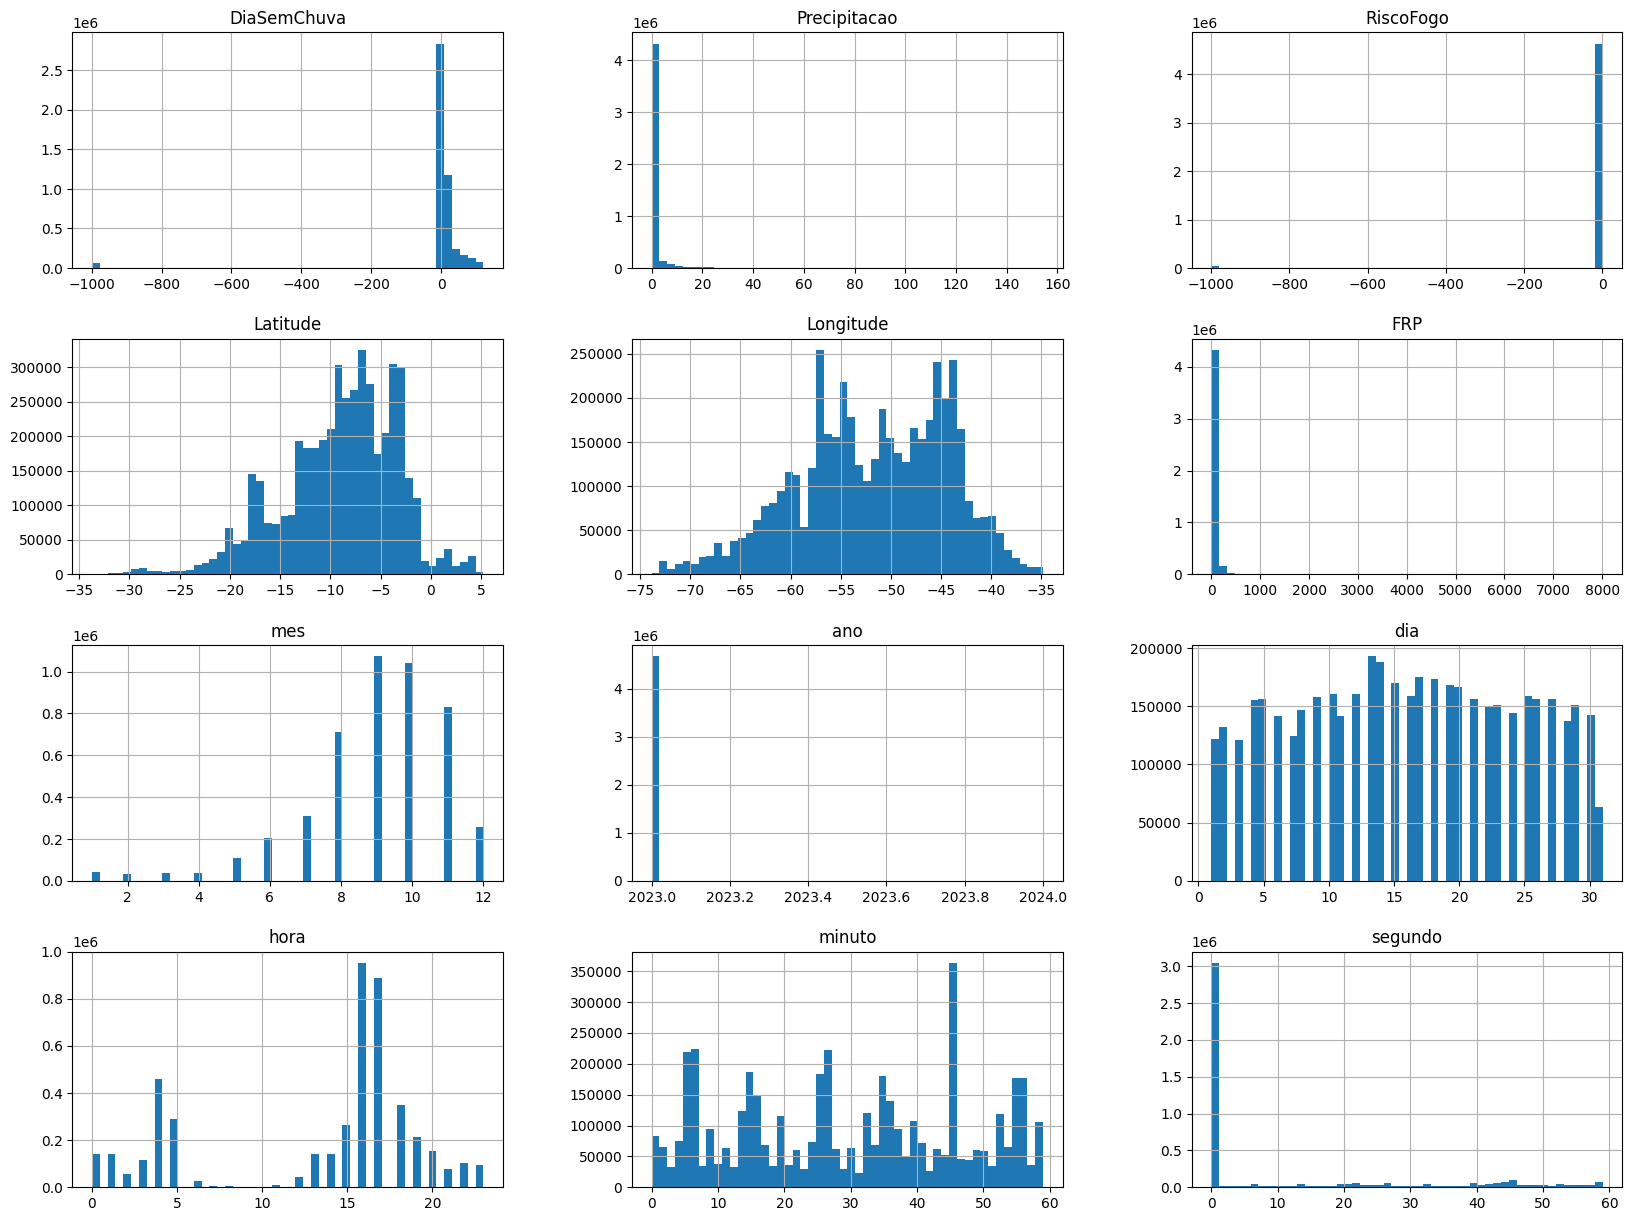

In [8]:
df.hist(bins=50, figsize=(20,15))

plt.show()

# Removendo colunas irrelevantes

Colunas sao consideradas irrelevantes caso elas nao variem muito como a coluna ano ou segundos

In [9]:
df.drop(['segundo', 'ano', ], axis=1, inplace=True)

In [10]:
df.head()

,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,mes,dia,hora,minuto
0,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.20,0.01,-17.55708,-57.20554,4.5,1,2,2,8
1,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.15,0.01,-17.55838,-57.21490,14.5,1,2,2,8
2,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.00,0.02,-17.62477,-57.29403,8.8,1,2,2,8
3,TERRA_M-M,Brasil,MATO GROSSO,POCONÉ,Pantanal,0.0,0.10,0.02,-17.62712,-57.17881,6.7,1,2,2,8
4,TERRA_M-M,Brasil,MATO GROSSO DO SUL,CAMAPUÃ,Cerrado,0.0,15.10,0.01,-19.44473,-53.99815,6.1,1,2,2,8


In [11]:
# Transformando as colunas de hora e minuto em uma única coluna

df['minuto_do_dia'] = df['hora'] * 60 # + df['minuto']

df.drop(['hora', 'minuto'], axis=1, inplace=True)

In [12]:
primeiro_dia_do_mes = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
df['dia_do_ano'] = df['mes'].apply(lambda x: primeiro_dia_do_mes[x-1]) + df['dia']

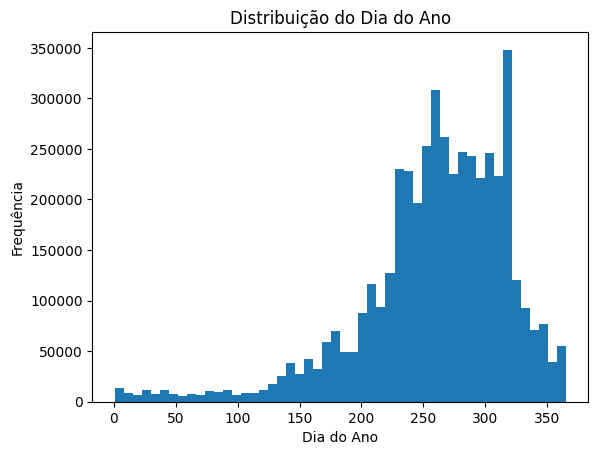

In [13]:
df['dia_do_ano'].plot(kind='hist', bins=50)
plt.xlabel('Dia do Ano')
plt.ylabel('Frequência')
plt.title('Distribuição do Dia do Ano')
plt.show()


In [14]:
# Tirando a coluna de mês e dia

df.drop(['mes', 'dia'], axis=1, inplace=True)

In [15]:
df.drop(['Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma'], axis=1, inplace=True)

In [16]:
df.head()

,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,minuto_do_dia,dia_do_ano
0,0.0,0.20,0.01,-17.55708,-57.20554,4.5,120,2
1,0.0,0.15,0.01,-17.55838,-57.21490,14.5,120,2
2,0.0,0.00,0.02,-17.62477,-57.29403,8.8,120,2
3,0.0,0.10,0.02,-17.62712,-57.17881,6.7,120,2
4,0.0,15.10,0.01,-19.44473,-53.99815,6.1,120,2


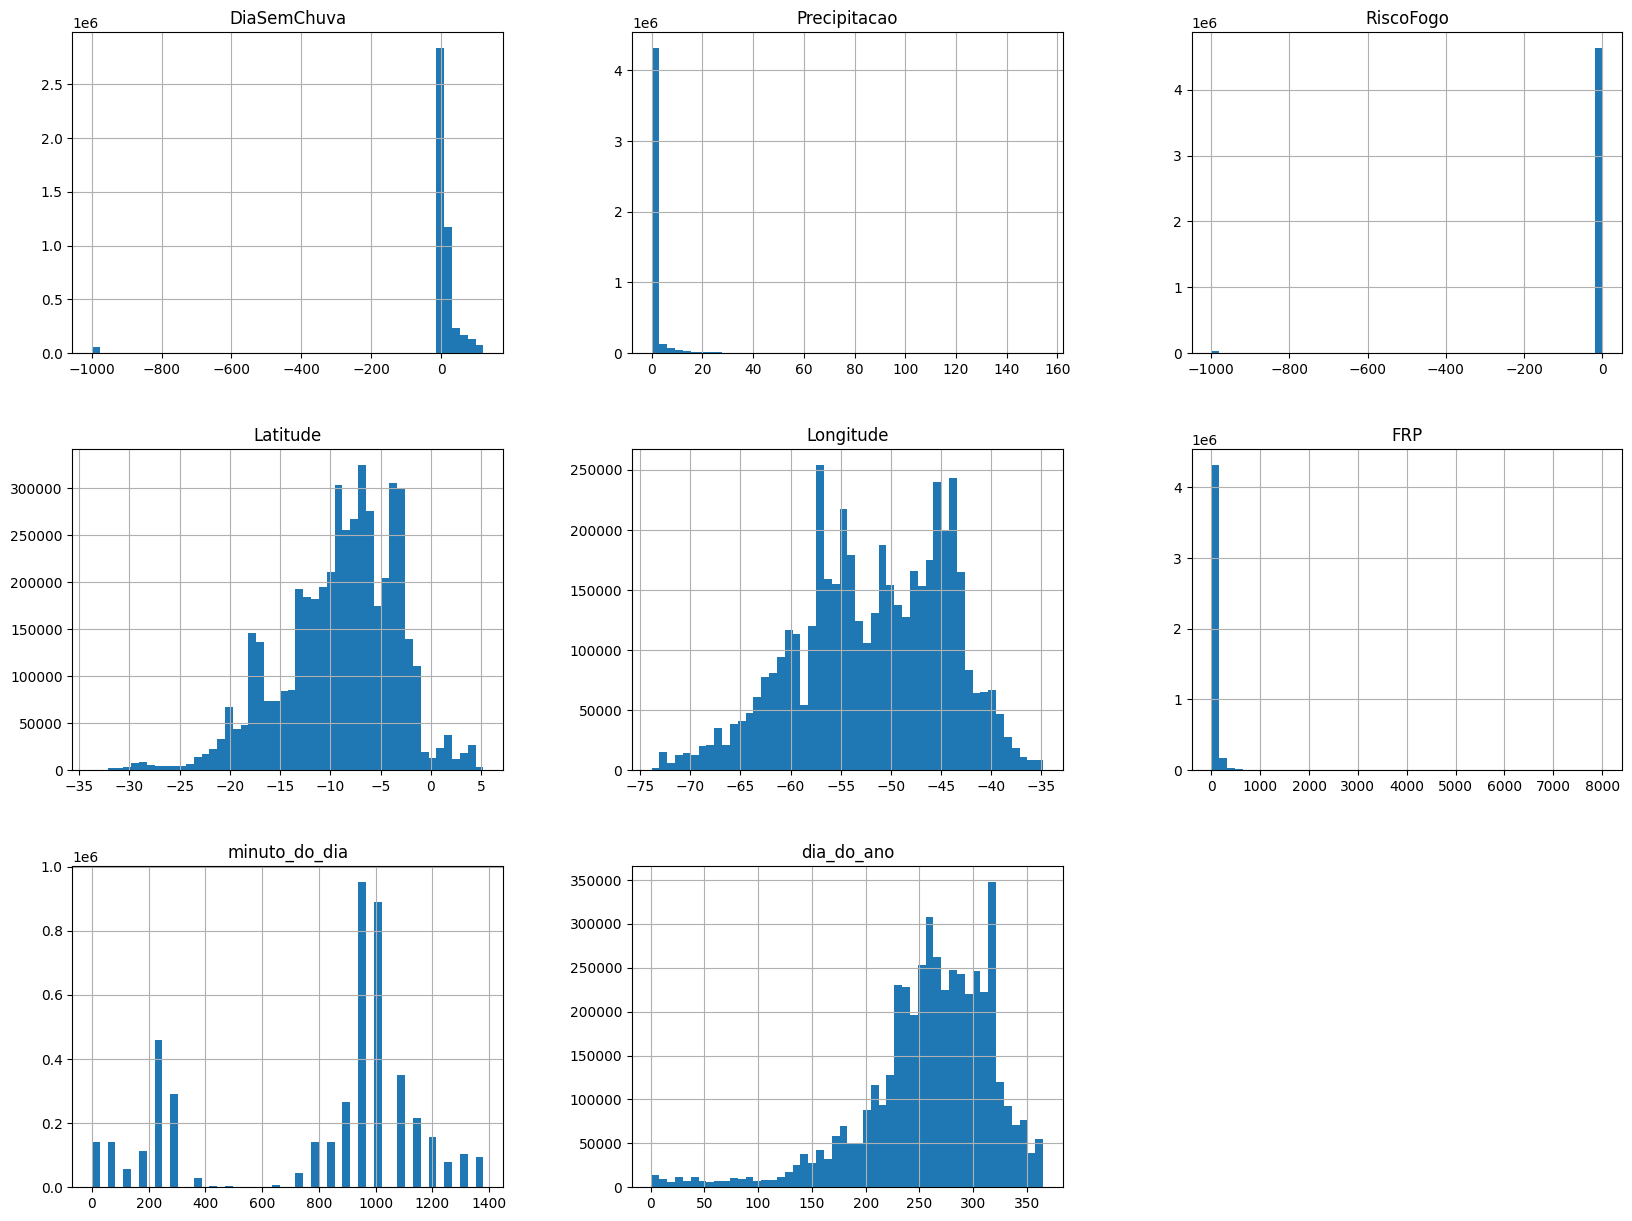

In [17]:
df.hist(bins=50, figsize=(20,15))

plt.show()

## Analisando a coluna FRP e Risco de Fogo para ver se sao boas candidatas para o objetivo do modelo de regressao

In [18]:
correlation = df.corr()['FRP']

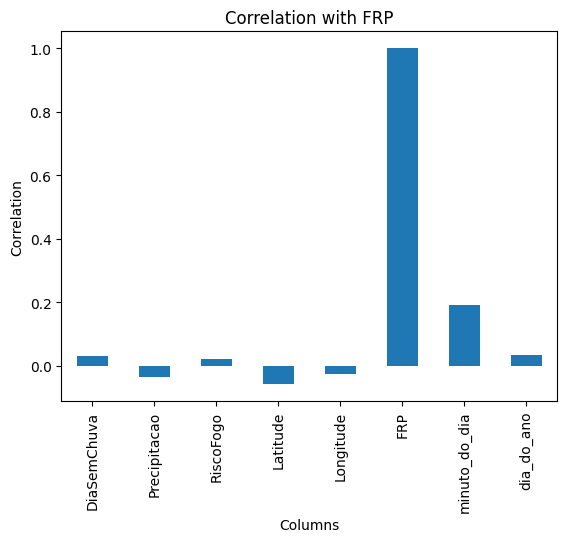

In [19]:
df.corr()['FRP'].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation with FRP')
plt.show()

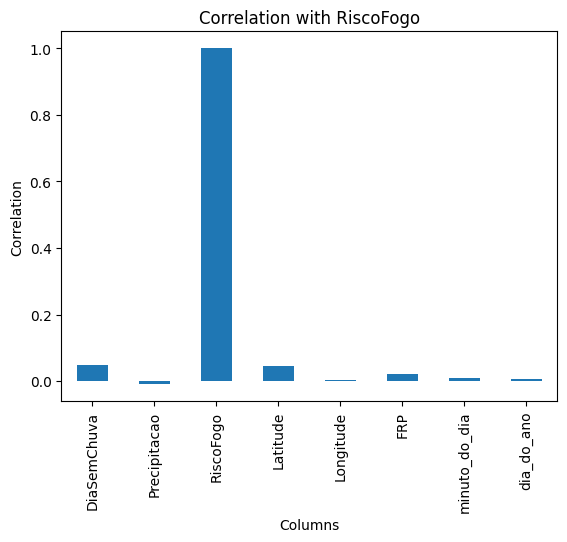

In [20]:
df.corr()['RiscoFogo'].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation with RiscoFogo')
plt.show()

# Removendo colunas que nao fazem sentidos

In [21]:
df.drop(['RiscoFogo', 'FRP'], axis=1, inplace=True)

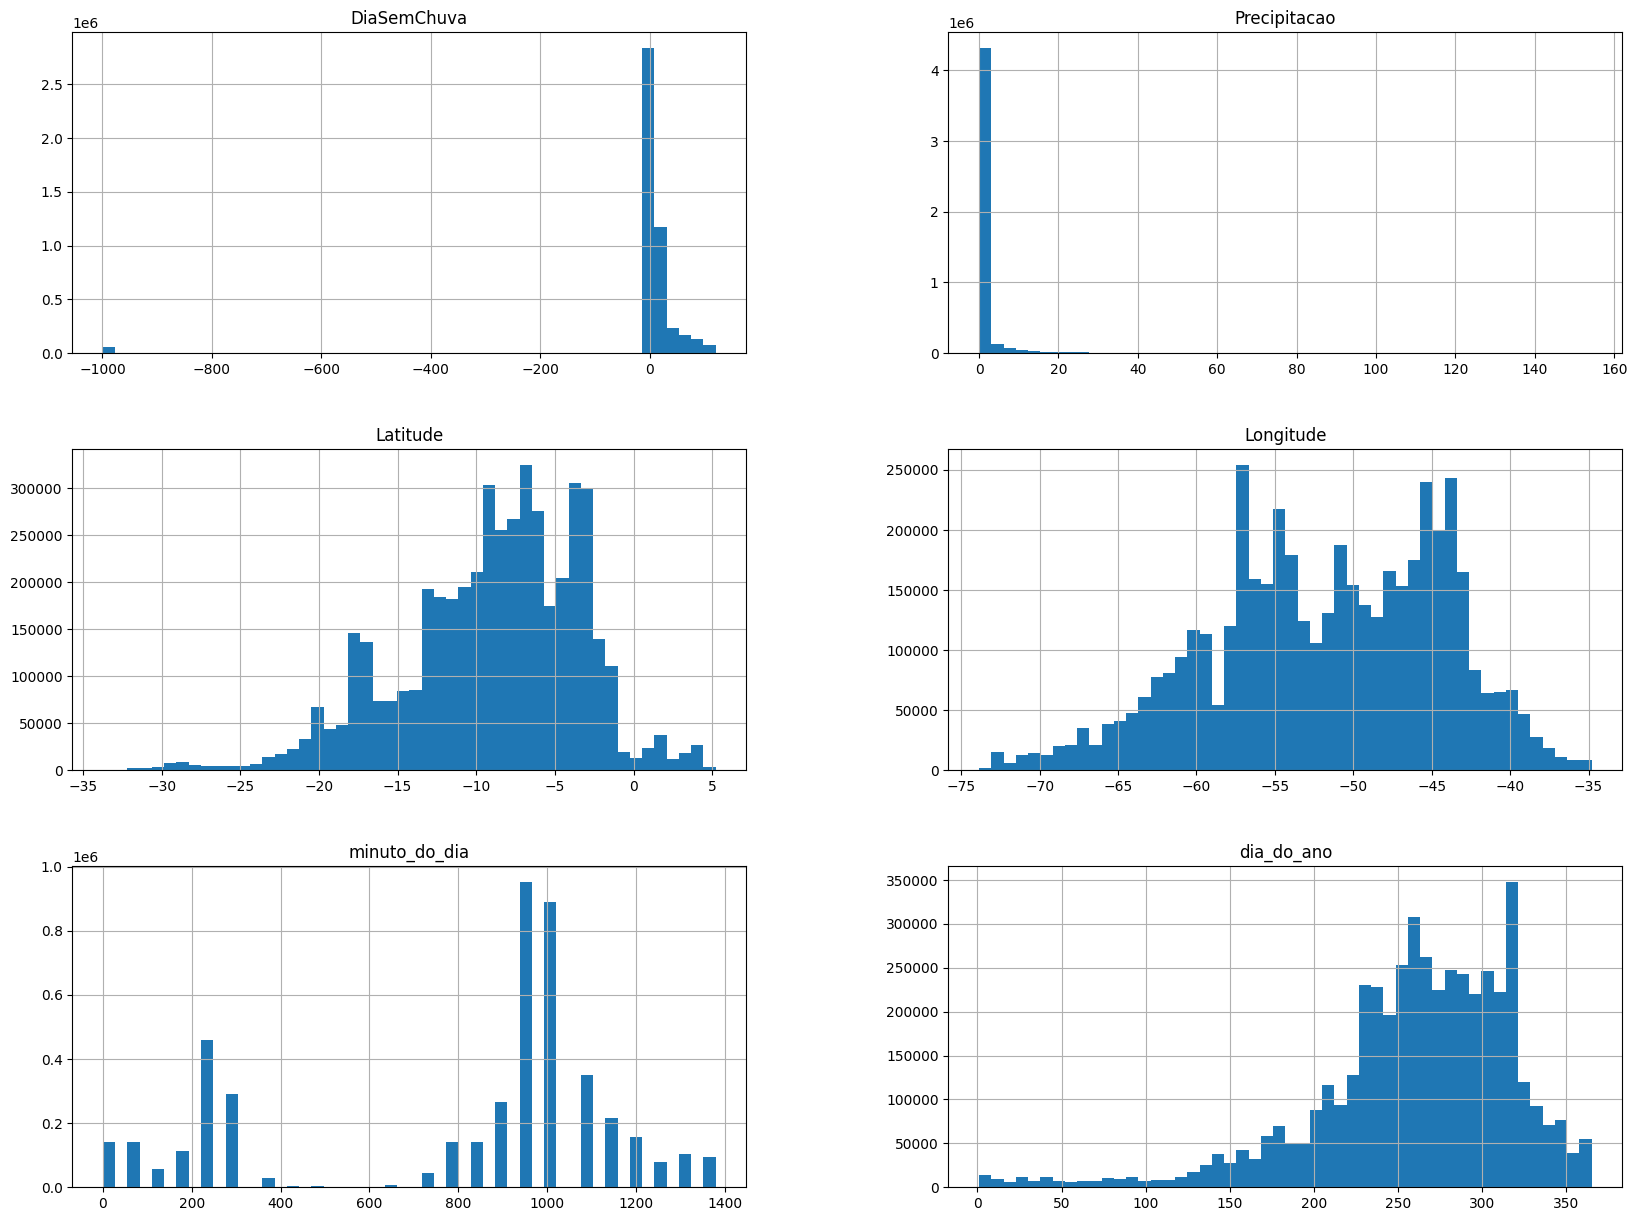

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Salvando snapshot do dataframe em csv

In [23]:
# Save the cleaned data into a new csv file
df.to_csv('cleaned_full_focos_qmd_inpe_20230301_20240101.csv', index=False)

In [24]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

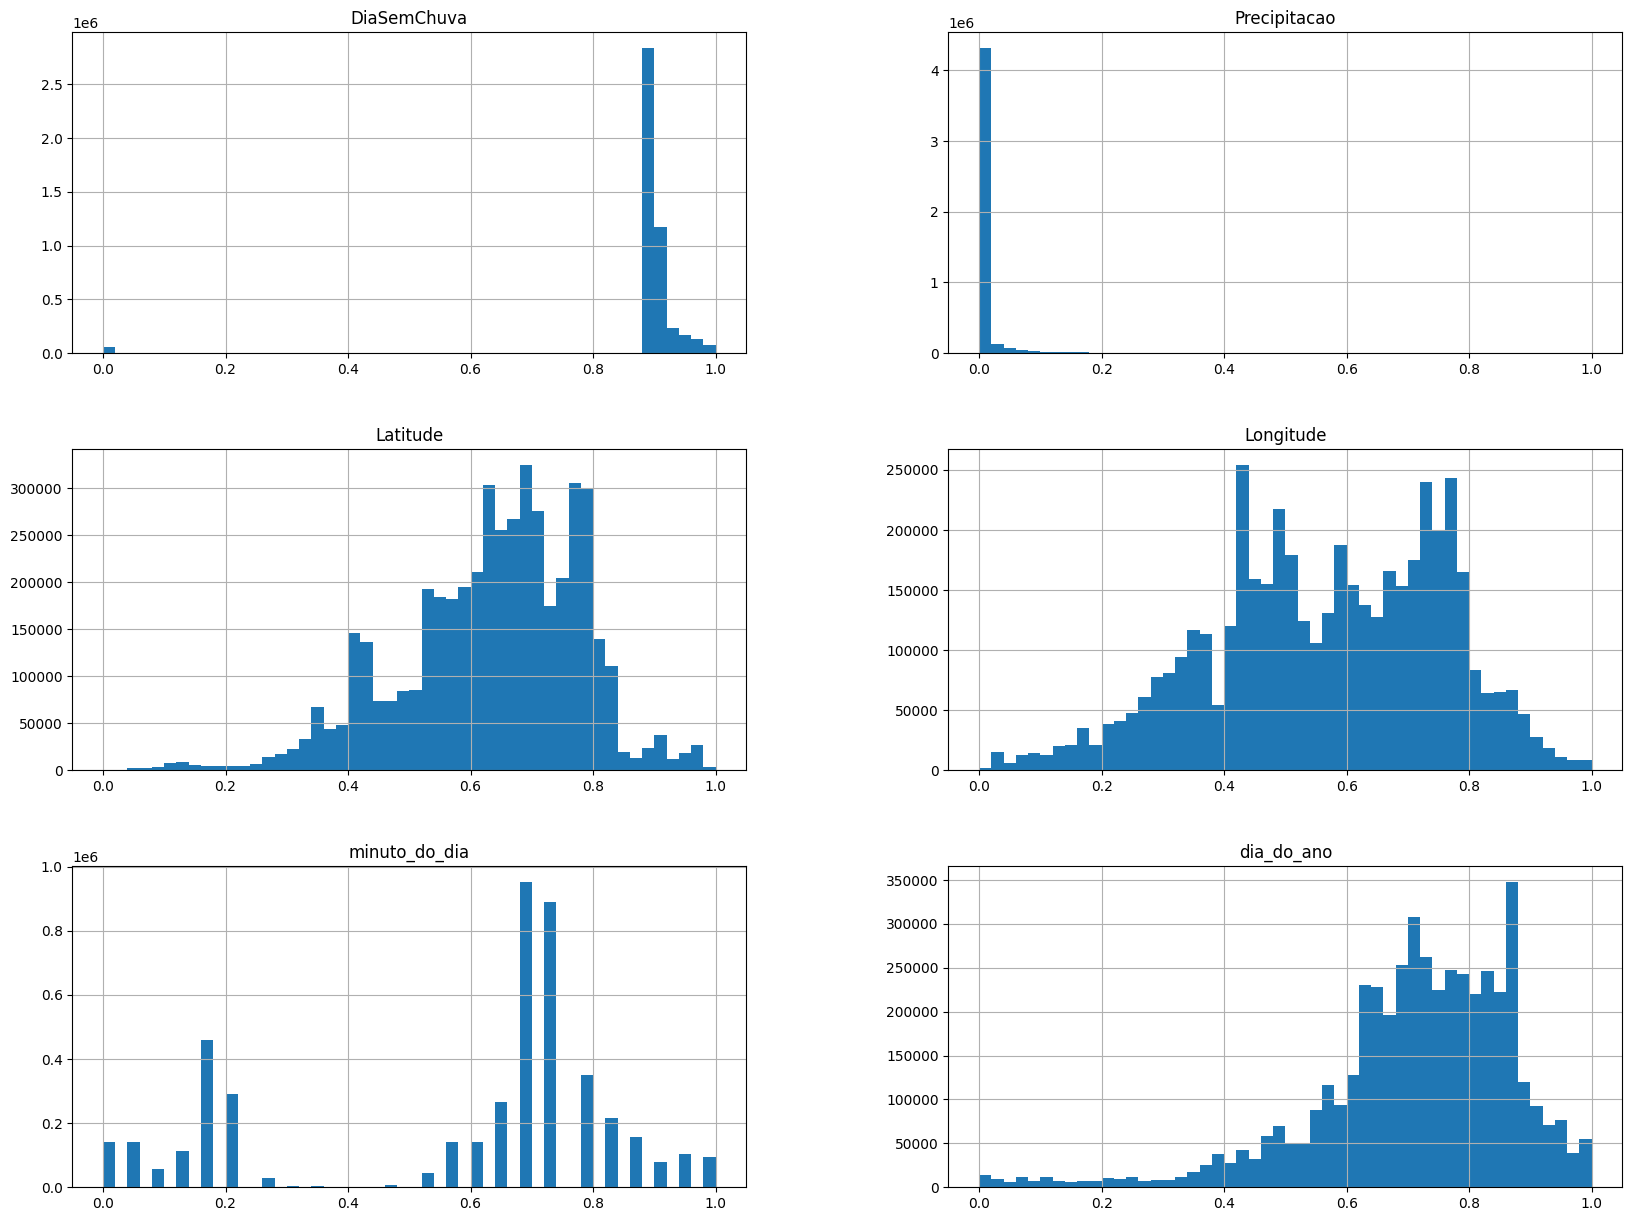

In [25]:
# Plot the normalized data
df_normalized.hist(bins=50, figsize=(20,15))
plt.show()

/tmp/ipykernel_135671/2978527299.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


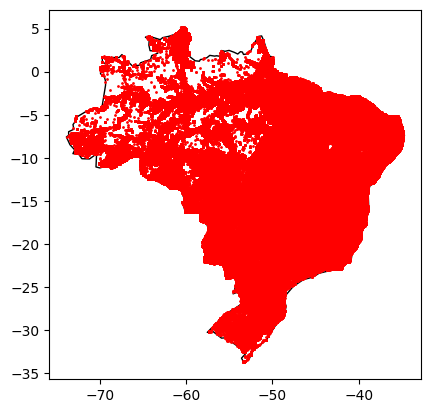

In [26]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

# Converter as coordenadas para geometria de pontos
gdf = GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])])

# Carregar um mapa mundi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = world[world.name == 'Brazil']
# Plotar o mapa mundi
base = brasil.plot(color='white', edgecolor='black')

# Plotar os pontos no mapa
gdf.plot(ax=base, marker='o', color='red', markersize=1)

# Mostrar o plot
plt.show()
